# **Spatial Patterns of insect Diversity in continetal Ecuador**

## **Completeness analysis**

Author: Daning Montaño - Ocampo

# **1. Packages and libraries**

In [272]:
library(dplyr)
library(ggplot2)
library(sf)
library(iNEXT)
library(tidyr)
#library(doParallel)
#

# 2. Load clean data and grids

In [273]:
insects_records = read.csv("Data/Records/insects_records_clean.csv")

# Transform to sf object
insects_records_sf = st_as_sf(insects_records, coords = c("decimalLongitude", "decimalLatitude"), crs = 4326)


In [274]:
insects_records_sf

Simple feature collection with 106818 features and 17 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID           basisOfRecord verbatimEventDate                    identifiedBy
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b Espec\xedmen Preservado        2022-02-08 Mauricio Gabriel Herrera Madrid
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506      Preserved Specimen        2021-12-20 Mayra Alejandra Guijarro Torres
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c       PreservesSpecemen        2021-09-16                  Valeria Granda
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34       PreservesSpecemen        2022-01-24                  Valeria Granda
5          9          BNDB    BND

In [275]:
grid_10km = st_read("Data/shp/grid_10km.shp")
grid_10km$id_10km = grid_10km$id
grid_10km = grid_10km %>% select(-id)
grid_2km = st_read("Data/shp/grid_2km.shp")
grid_2km$id_2km = grid_2km$id
grid_2km = grid_2km %>% select(-id)

Reading layer `grid_10km' from data source `C:\PROYECTOS\Spatial_patterns_insects\CODIGOS\Data\shp\grid_10km.shp' using driver `ESRI Shapefile'
Simple feature collection with 7268 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.32114 ymin: -6.003704 xmax: -74.19902 ymax: 2.31959
Geodetic CRS:  WGS 84
Reading layer `grid_2km' from data source `C:\PROYECTOS\Spatial_patterns_insects\CODIGOS\Data\shp\grid_2km.shp' using driver `ESRI Shapefile'
Simple feature collection with 116350 features and 5 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.01119 ymin: -5.022759 xmax: -75.15773 ymax: 1.454985
Geodetic CRS:  WGS 84


# 3. Join points to grids

We are going to extract the ID of each square in the 10 km grid using the 2 km grid, so that we can link them. 

First we extract centroids from grid 2km to avoid problems with the boundaries of the grid

In [277]:
centroides_2km = grid_2km %>% st_centroid()
centroides_2km

Warning message:
st_centroid assumes attributes are constant over geometries 


Simple feature collection with 116350 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.00216 ymin: -5.013713 xmax: -75.16678 ymax: 1.445938
Geodetic CRS:  WGS 84
First 10 features:
       left      top    right   bottom id_2km                   geometry
1  498760.1 10160820 500760.1 10158820      1 POINT (-81.00216 1.445938)
2  498760.1 10158820 500760.1 10156820      2 POINT (-81.00216 1.427843)
3  498760.1 10156820 500760.1 10154820      3 POINT (-81.00216 1.409749)
4  498760.1 10154820 500760.1 10152820      4 POINT (-81.00216 1.391654)
5  498760.1 10152820 500760.1 10150820      5  POINT (-81.00216 1.37356)
6  498760.1 10150820 500760.1 10148820      6 POINT (-81.00216 1.355465)
7  498760.1 10148820 500760.1 10146820      7 POINT (-81.00216 1.337371)
8  498760.1 10146820 500760.1 10144820      8 POINT (-81.00216 1.319276)
9  498760.1 10144820 500760.1 10142820      9 POINT (-81.00216 1.301182)
10 498760.1 10142820 500760.1 10140820     10 POINT 

We create a spatial features with id froms 10 km grids

In [278]:
centroids_2km_with_10km_id <- st_join(centroides_2km, 
  grid_10km %>% select(id_10km), 
  join = st_intersects)

Join the information extracted by centroids with the original grid_2km using the id_2km

In [279]:
grid_2km$id_10km = centroids_2km_with_10km_id$id_10km

By locating the points, we will extract ID information from the grid tables. This allows us to work on the analyses and simply join the results to the grid, making the process more efficient.

In [280]:
grid_2km

Simple feature collection with 116350 features and 6 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.01119 ymin: -5.022759 xmax: -75.15773 ymax: 1.454985
Geodetic CRS:  WGS 84
First 10 features:
       left      top    right   bottom id_2km                       geometry id_10km
1  498760.1 10160820 500760.1 10158820      1 POLYGON ((-81.01115 1.45498...     286
2  498760.1 10158820 500760.1 10156820      2 POLYGON ((-81.01115 1.43689...     286
3  498760.1 10156820 500760.1 10154820      3 POLYGON ((-81.01115 1.41879...     287
4  498760.1 10154820 500760.1 10152820      4 POLYGON ((-81.01115 1.40070...     287
5  498760.1 10152820 500760.1 10150820      5 POLYGON ((-81.01115 1.38260...     287
6  498760.1 10150820 500760.1 10148820      6 POLYGON ((-81.01115 1.36451...     287
7  498760.1 10148820 500760.1 10146820      7 POLYGON ((-81.01115 1.34641...     287
8  498760.1 10146820 500760.1 10144820      8 POLYGON ((-81.01115 1.32832...     288
9  498760.1 101

In [281]:
recors_grid_2km <- st_join(
  insects_records_sf,
  grid_2km %>% select(id_2km, id_10km),   
  join = st_within                              # inside polygons
)
recors_grid_2km

Simple feature collection with 106818 features and 19 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID           basisOfRecord verbatimEventDate                    identifiedBy
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b Espec\xedmen Preservado        2022-02-08 Mauricio Gabriel Herrera Madrid
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506      Preserved Specimen        2021-12-20 Mayra Alejandra Guijarro Torres
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c       PreservesSpecemen        2021-09-16                  Valeria Granda
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34       PreservesSpecemen        2022-01-24                  Valeria Granda
5          9          BNDB    BND

# 4. Records per 10 km grid

We calculate the number of records per 10 km grid usind id_10km

In [282]:
total_records_per_grid = recors_grid_2km %>%
  as.data.frame() %>%
  group_by(id_10km)%>%
  summarise(Total_records = n()) %>%
  as.data.frame()


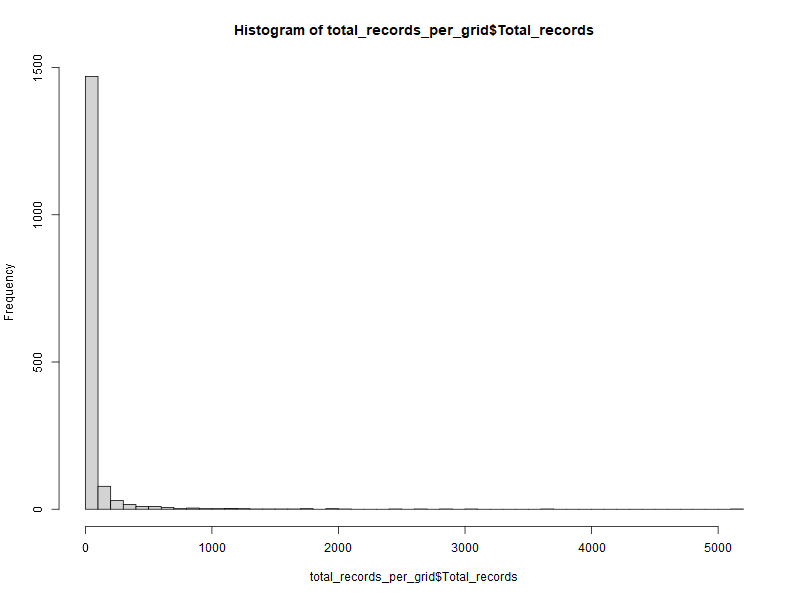

In [283]:
hist(total_records_per_grid$Total_records, breaks = 50)

Join results to 10 km grid

In [284]:
grid_10km = grid_10km%>% 
  left_join(total_records_per_grid, by = "id_10km")

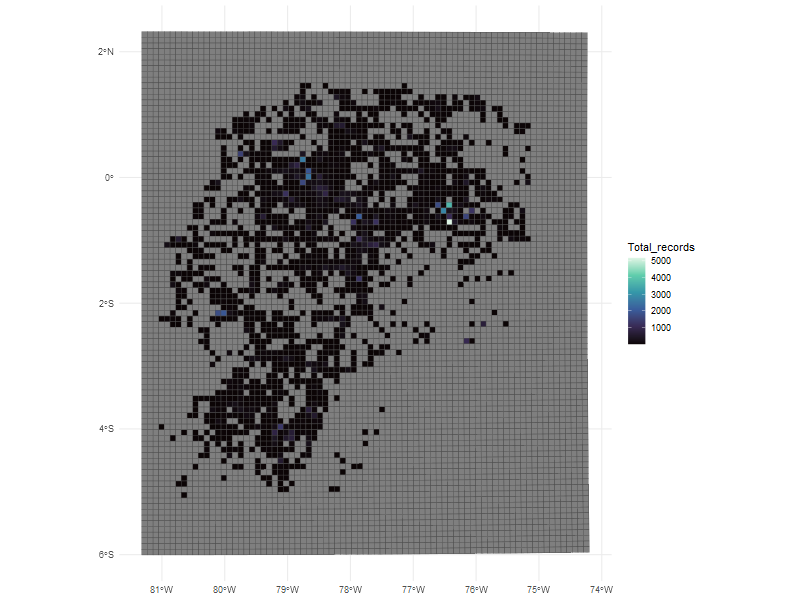

In [285]:
ggplot(grid_10km) +
  geom_sf(aes(fill = Total_records), color = "grey30", size = 0.1) +
  scale_fill_viridis_c(option = "mako") +
  theme_minimal()

# 5. Sp per 10 km grid

In [292]:
total_genus_per_grid = recors_grid_2km %>%
  as.data.frame() %>%
  group_by(id_10km)%>%
  distinct(genus) %>%
  summarise(Total_genus = n()) %>%
  as.data.frame()
total_genus_per_grid

    id_10km Total_genus
1       327           3
2       346           1
3       406          35
4       419           7
5       497           4
6       498           6
7       503          29
8       504           5
9       505          72
10      510          13
11      511          11
12      512           2
13      532           8
14      589         102
15      590           2
16      592           1
17      593           3
18      595          29
19      597           5
20      598          28
21      599           3
22      600           2
23      601           1
24      603           4
25      604           1
26      632           8
27      681          10
28      682           3
29      687           1
30      688           1
31      690           6
32      691           2
33      693           1
34      715           1
35      723           2
36      724           1
37      726           1
38      771           6
39      774           5
40      775           2
41      777     

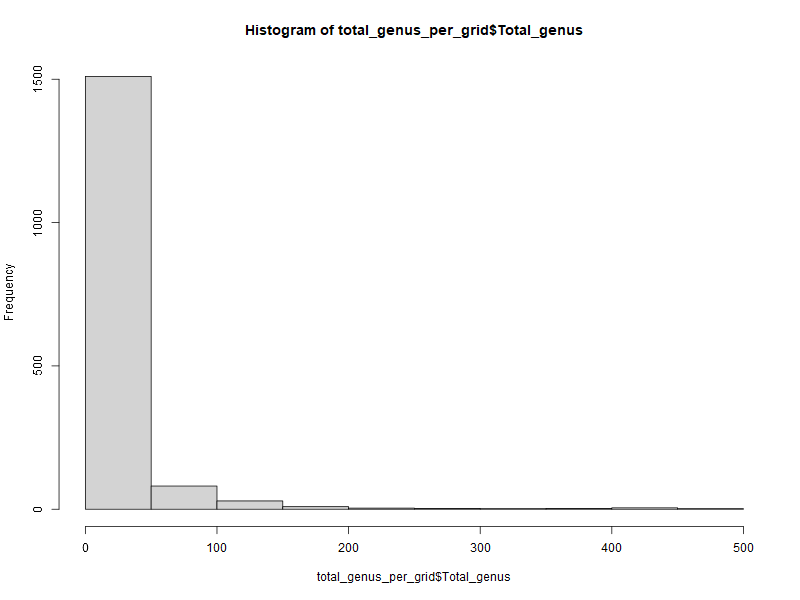

In [293]:
hist(total_genus_per_grid$Total_genus)

In [294]:
grid_10km = grid_10km%>% 
  left_join(total_genus_per_grid, by = "id_10km")
grid_10km

Simple feature collection with 7268 features and 8 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -81.32114 ymin: -6.003704 xmax: -74.19902 ymax: 2.31959
Geodetic CRS:  WGS 84
First 10 features:
       left      top    right   bottom id_10km Total_records Total_sp Total_genus                       geometry
1  464459.9 10256386 474459.9 10246386       1            NA       NA          NA POLYGON ((-81.31965 2.31955...
2  464459.9 10246386 474459.9 10236386       2            NA       NA          NA POLYGON ((-81.31963 2.22908...
3  464459.9 10236386 474459.9 10226386       3            NA       NA          NA POLYGON ((-81.31961 2.13861...
4  464459.9 10226386 474459.9 10216386       4            NA       NA          NA POLYGON ((-81.31959 2.04814...
5  464459.9 10216386 474459.9 10206386       5            NA       NA          NA POLYGON ((-81.31957 1.95767...
6  464459.9 10206386 474459.9 10196386       6            NA       NA          NA POLYGON ((-81.31956 1.8

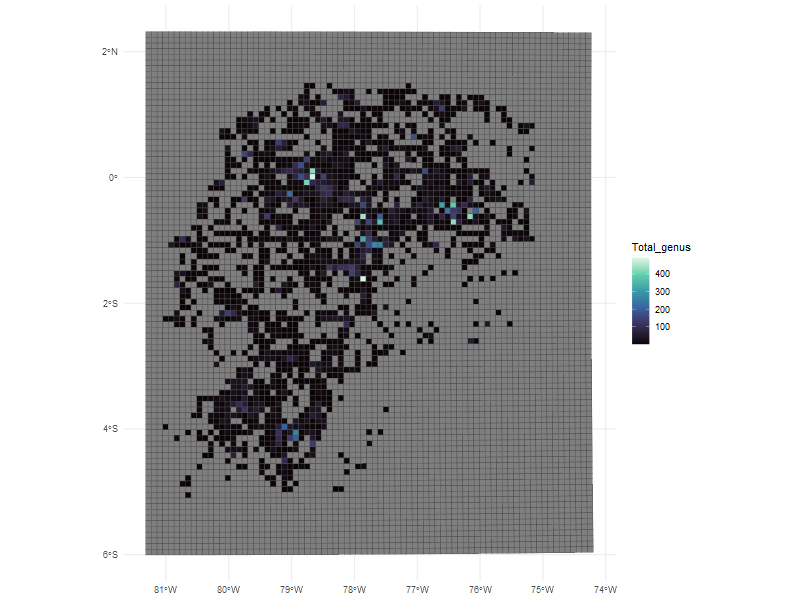

In [295]:
ggplot(grid_10km) +
  geom_sf(aes(fill = Total_genus), color = "grey30", size = 0.1) +
  scale_fill_viridis_c(option = "mako") +
  theme_minimal()

## 5.1 Correlaction records x sp

In [296]:
cor(grid_10km$Total_records, grid_10km$Total_genus, method = "spearman", use = "complete.obs")

[1] 0.9491338

Warning messages:
1: Removed 5621 rows containing non-finite outside the scale range (`stat_smooth()`). 
2: Removed 5621 rows containing missing values or values outside the scale range (`geom_point()`). 


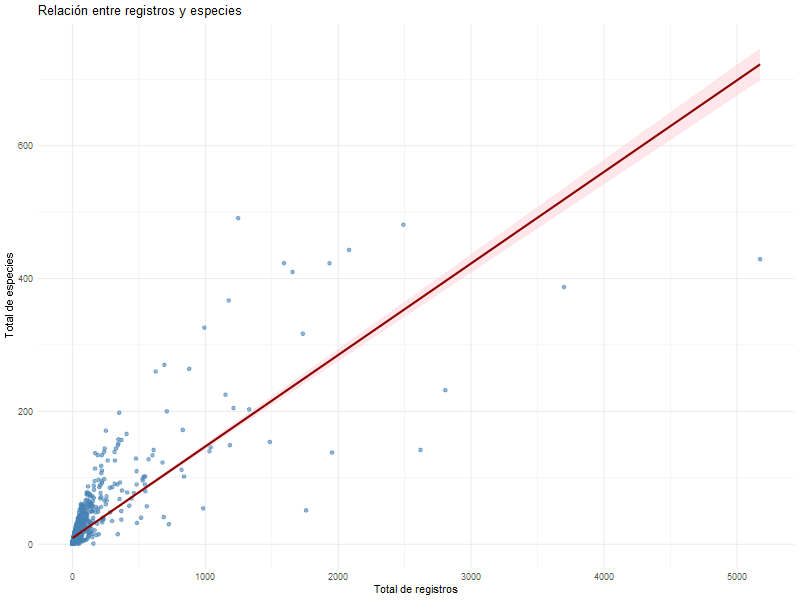

`geom_smooth()` using formula = 'y ~ x'

In [297]:
ggplot(grid_10km, aes(x = Total_records, y = Total_genus)) +
  geom_point(alpha = 0.6, color = "steelblue") +
  geom_smooth(method = "lm", se = TRUE, color = "darkred", fill = "pink") +
  theme_minimal() +
  labs(
    x = "Total de registros",
    y = "Total de especies",
    title = "Relación entre registros y especies"
  )

# 6. Sampling Completness

## 6.1. Completness - Country level

Calculate completnes for all country using incidens data and each 10 km cell is a unit

In [298]:
recors_grid_2km

Simple feature collection with 106818 features and 19 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID           basisOfRecord verbatimEventDate                    identifiedBy
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b Espec\xedmen Preservado        2022-02-08 Mauricio Gabriel Herrera Madrid
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506      Preserved Specimen        2021-12-20 Mayra Alejandra Guijarro Torres
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c       PreservesSpecemen        2021-09-16                  Valeria Granda
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34       PreservesSpecemen        2022-01-24                  Valeria Granda
5          9          BNDB    BND

In [299]:
ecu_incidens_matrix <- recors_grid_2km %>%
  as.data.frame() %>%
  distinct(id_10km, genus) %>%          # 1 por unidad-especie
  mutate(val = 1L) %>%
  pivot_wider(names_from = genus, values_from = val, values_fill = 0) %>%
  arrange(id_10km)
ids_unidades_ecu <- ecu_incidens_matrix$id_10km

# Quitamos la columna de IDs para dejar solo 0/1 por especie
incidences_ecu_df <- ecu_incidens_matrix %>% dplyr::select(-id_10km)

# Matriz of incidences - iNext
inext_in_ecu <- list(ensamblaje = as.data.frame(t(incidences_ecu_df)))




Use iNEXT funtion to calculate the sampling coverage in Ecuador, an only extract richness (q=0) and sampling coverage

In [300]:
result_inext_ecu <- iNEXT(inext_in_ecu, q = 0, datatype = "incidence_raw", se = TRUE, conf = 0.95,nboot= 200 )

In [301]:
result_inext_ecu

Compare 1 assemblages with Hill number order q = 0.
$class: iNEXT

$DataInfo: basic data information
  Assemblage    T     U S.obs     SC   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8 Q9 Q10
1 ensamblaje 1648 29984  4304 0.9477 1570 662 389 249 189 150 135 102 75  71

$iNextEst: diversity estimates with rarefied and extrapolated samples.
$size_based (LCL and UCL are obtained for fixed size.)

   Assemblage    t        Method Order.q         qD     qD.LCL     qD.UCL         SC     SC.LCL     SC.UCL
1  ensamblaje    1   Rarefaction       0   18.19417   17.96223   18.42612 0.01983418 0.01923892 0.02042944
10 ensamblaje  824   Rarefaction       0 3279.67012 3240.82563 3318.51460 0.90797023 0.90581650 0.91012395
20 ensamblaje 1648      Observed       0 4304.00000 4246.54550 4361.45450 0.94766554 0.94548652 0.94984455
30 ensamblaje 2429 Extrapolation       0 4917.13617 4839.11462 4995.15772 0.96491188 0.96246123 0.96736253
40 ensamblaje 3296 Extrapolation       0 5364.23946 5258.45159 5470.02733 0.977488

In [302]:
info_inext_ecu <- DataInfo(inext_in_ecu, datatype = "incidence_raw")  # columna SC = sample coverage; T = # unidades de muestreo


In [303]:
info_inext_ecu

  Assemblage    T     U S.obs     SC   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8 Q9 Q10
1 ensamblaje 1648 29984  4304 0.9477 1570 662 389 249 189 150 135 102 75  71

Warning message:
In ggiNEXT.iNEXT(result_inext_ecu, type = 2) :
  invalid color.var setting, the iNEXT object do not consist multiple assemblages, change setting as Order.q


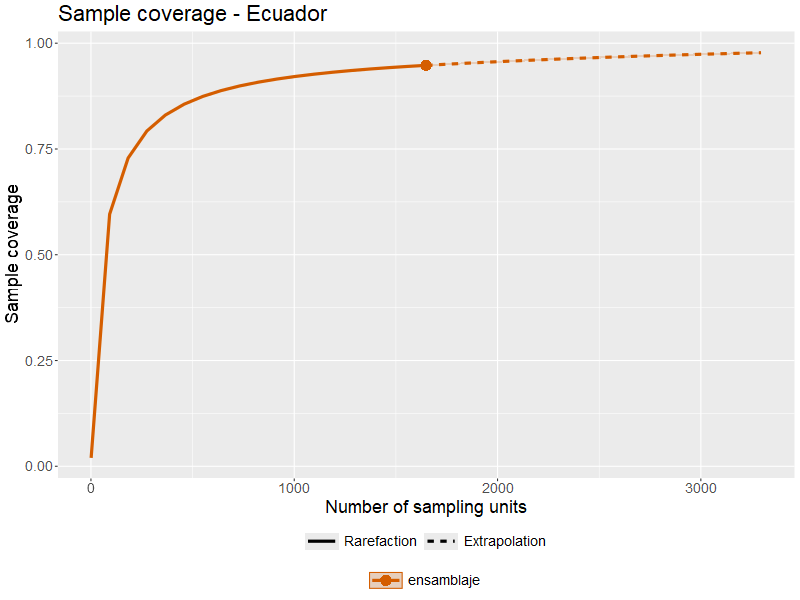

In [304]:
plot_units_sc <- ggiNEXT(result_inext_ecu, type = 2) + labs(title = "Sample coverage - Ecuador")
plot_units_sc

Warning message:
In ggiNEXT.iNEXT(result_inext_ecu, type = 1) :
  invalid color.var setting, the iNEXT object do not consist multiple assemblages, change setting as Order.q


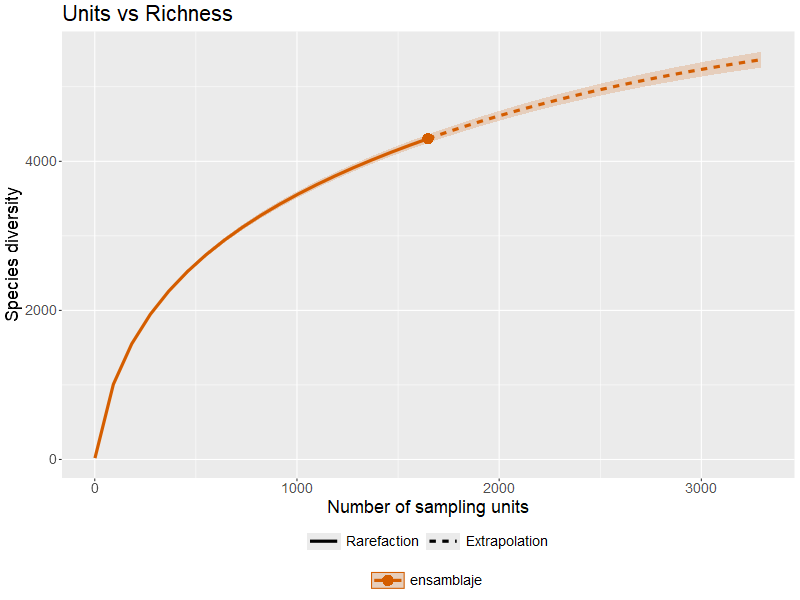

In [305]:
plot_units_richness <- ggiNEXT(result_inext_ecu, type = 1) + labs(title = "Units vs Richness")
plot_units_richness

## 6.2. Grid

### 6.2.1 Sample coverage

Calculamos la completitud de la muestra usando el paquete iNEXT. Para esto se usarán las incidencias de las especies, y dentro de cada grid de 10 km, cada celda de 2 km es una unidad, en done evaluamos como el incluir unidades cambia la cobertura de la muestra

In [306]:
recors_grid_2km

Simple feature collection with 106818 features and 19 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -81.2837 ymin: -5.911452 xmax: -74.38333 ymax: 2.00376
Geodetic CRS:  WGS 84
First 10 features:
   id_record database_name database_id                         occurrenceID           basisOfRecord verbatimEventDate                    identifiedBy
1          1          BNDB    BNDB_971 67bd219f-d2d7-4a41-8d4f-ca6a1c12d08b Espec\xedmen Preservado        2022-02-08 Mauricio Gabriel Herrera Madrid
2          3          BNDB    BNDB_973 b80a793e-c04b-4b41-88db-d8b4dba78506      Preserved Specimen        2021-12-20 Mayra Alejandra Guijarro Torres
3          5          BNDB    BNDB_975 c59d8984-031e-4e9c-bf23-a8df7c08661c       PreservesSpecemen        2021-09-16                  Valeria Granda
4          7          BNDB    BNDB_977 097f5ff4-866e-4e1b-b17e-dd3847addc34       PreservesSpecemen        2022-01-24                  Valeria Granda
5          9          BNDB    BND

In [307]:

# Unique 10-km IDs
cid_10km <- unique(recors_grid_2km$id_10km)

# Results container
results_s_cov <- data.frame(
  id_10km = integer(),
  Samplig_coverage = numeric(),  # observed SC
  n_units = numeric(),           # T
  n_incidences = numeric(),      # U
  genus_obs = numeric(),            # S.obs
  Q1 = numeric(),
  Q2 = numeric(),
  sc_ext = numeric(),            # SC at max coverage row
  n_units_ext = numeric(),       # t at max coverage row
  genus_ext = numeric(),            # qD at max coverage row
  stringsAsFactors = FALSE
)

# Progress bar
pb <- txtProgressBar(min = 0, max = length(cid_10km), style = 3)
count <- 0

for (i in cid_10km) {

  # Build incidence matrix (rows = id_2km, cols = species, 0/1)
  records_by_id <- recors_grid_2km %>% dplyr::filter(id_10km == i)

  incidens_matrix_2km <- records_by_id %>%
    as.data.frame() %>%
    dplyr::distinct(id_2km, genus) %>%
    dplyr::mutate(val = 1L) %>%
    tidyr::pivot_wider(names_from = genus, values_from = val, values_fill = 0) %>%
    dplyr::arrange(id_2km)

  ids_unidades_2km <- incidens_matrix_2km$id_2km
  incidens_matrix_2km_df <- incidens_matrix_2km %>% dplyr::select(-id_2km)

  # Ensure numeric 0/1 for iNEXT
  incidens_matrix_2km_df[] <- lapply(incidens_matrix_2km_df, as.numeric)

  # iNEXT input
  inext_grid_2km <- list(ensamblaje = as.data.frame(t(incidens_matrix_2km_df)))

  # Run iNEXT and extract metrics
  sampl_result <- tryCatch({
    result_inext_2km_grid <- iNEXT(
      inext_grid_2km,
      q = 0,
      datatype = "incidence_raw",
      se = FALSE
    )

    sc_obs      <- result_inext_2km_grid$DataInfo$SC
    n_units_obs <- result_inext_2km_grid$DataInfo$T
    n_incid     <- result_inext_2km_grid$DataInfo$U
    genus_obs      <- result_inext_2km_grid$DataInfo$S.obs
    Q1          <- result_inext_2km_grid$DataInfo$Q1
    Q2          <- result_inext_2km_grid$DataInfo$Q2

    cb <- result_inext_2km_grid$iNextEst$coverage_based
    sc_ext      <- if (!is.null(cb)) tail(cb$SC, 1) else NA_real_
    n_units_ext <- if (!is.null(cb)) tail(cb$t,  1) else NA_real_
    genus_ext      <- if (!is.null(cb)) tail(cb$qD, 1) else NA_real_

    data.frame(
      Samplig_coverage = sc_obs,
      n_units = n_units_obs,
      n_incidences = n_incid,
      genus_obs = genus_obs,
      Q1 = Q1,
      Q2 = Q2,
      sc_ext = sc_ext,
      n_units_ext = n_units_ext,
      genus_ext = round(genus_ext, 0),
      stringsAsFactors = FALSE
    )
  }, error = function(e) {
    data.frame(
      Samplig_coverage = NA_real_,
      n_units = NA_real_,
      n_incidences = NA_real_,
      genus_obs = NA_real_,
      Q1 = NA_real_,
      Q2 = NA_real_,
      sc_ext = NA_real_,
      n_units_ext = NA_real_,
      genus_ext = NA_real_,
      stringsAsFactors = FALSE
    )
  })

  # Append row for this 10-km cell
  results_s_cov <- rbind(
    results_s_cov,
    cbind(data.frame(id_10km = i, stringsAsFactors = FALSE), sampl_result)
  )

  count <- count + 1
  setTxtProgressBar(pb, count)
}

# Close progress bar
close(pb)



  |============================================================================================================================================| 100%

There were 50 or more warnings (use warnings() to see the first 50)


In [308]:
results_s_cov

    id_10km Samplig_coverage n_units n_incidences genus_obs  Q1 Q2     sc_ext n_units_ext genus_ext
1      2149           0.1948       4           27        25  23  2 0.35731935           8        45
2      4633           0.5017       4           58        45  34  9 0.73989689           8        68
3      4444           0.0692       8           33        32  31  1 0.13505533          16        62
4      4073           0.0741       2           26        26  26  0 0.21319265           4        50
5      4448           0.1705       6           14        13  12  1 0.31865019          12        24
6      5089           0.1756       4           15        14  13  1 0.32507449           8        25
7      2417           0.1526      11           72        67  62  5 0.28932200          22       123
8      3888           0.0599       6           40        39  38  1 0.11714331          12        76
9      3143           0.8333       5           48        28  12 12 0.97805213          10        32


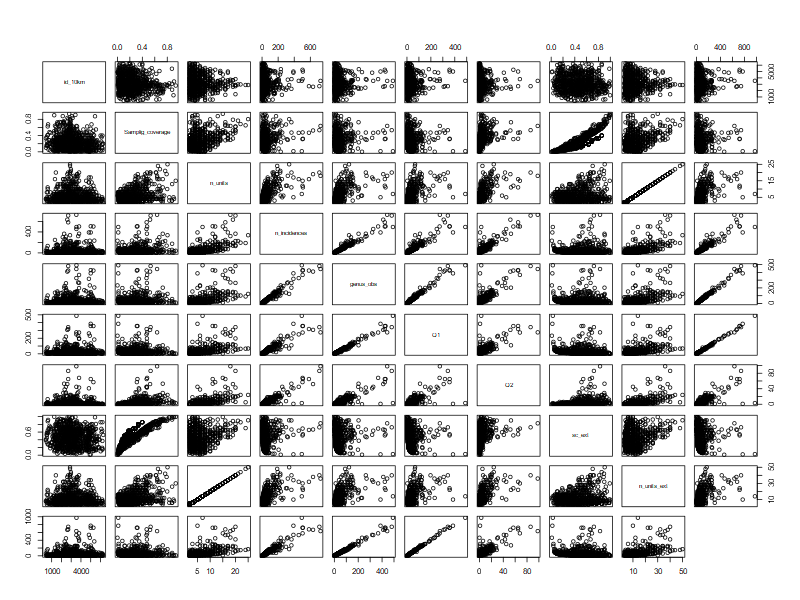

In [309]:
## grafica de correlaciop y dispersion de variables de el dataframe results_s_cov en r


pairs(results_s_cov, main = "Pairs Plot of Iris Data")


In [310]:
cor(results_s_cov, method = "spearman", use = "pairwise.complete.obs")

                      id_10km Samplig_coverage      n_units n_incidences    genus_obs          Q1          Q2      sc_ext  n_units_ext   genus_ext
id_10km           1.000000000     -0.109614189  0.005096273 -0.001250566  0.012234092  0.02812325 -0.05391629 -0.08318839  0.007323269  0.02467554
Samplig_coverage -0.109614189      1.000000000  0.202767346  0.097709287  0.008835196 -0.08893260  0.64211432  0.89190408  0.209013240 -0.05435099
n_units           0.005096273      0.202767346  1.000000000  0.620707717  0.585728742  0.54709702  0.65205453 -0.03580948  0.998959221  0.58249064
n_incidences     -0.001250566      0.097709287  0.620707717  1.000000000  0.992002639  0.96432437  0.71889907 -0.24439557  0.611412457  0.97892597
genus_obs         0.012234092      0.008835196  0.585728742  0.992002639  1.000000000  0.98908471  0.66322652 -0.31941023  0.576349045  0.99538660
Q1                0.028123252     -0.088932597  0.547097020  0.964324367  0.989084708  1.00000000  0.58521176 -0.39975

In [311]:
View(results_s_cov)

### 6.2.2. Sample completeness

In [313]:
genus_completeness = (results_s_cov$genus_obs/results_s_cov$genus_ext)*100
results_s_cov$genus_completeness = genus_completeness

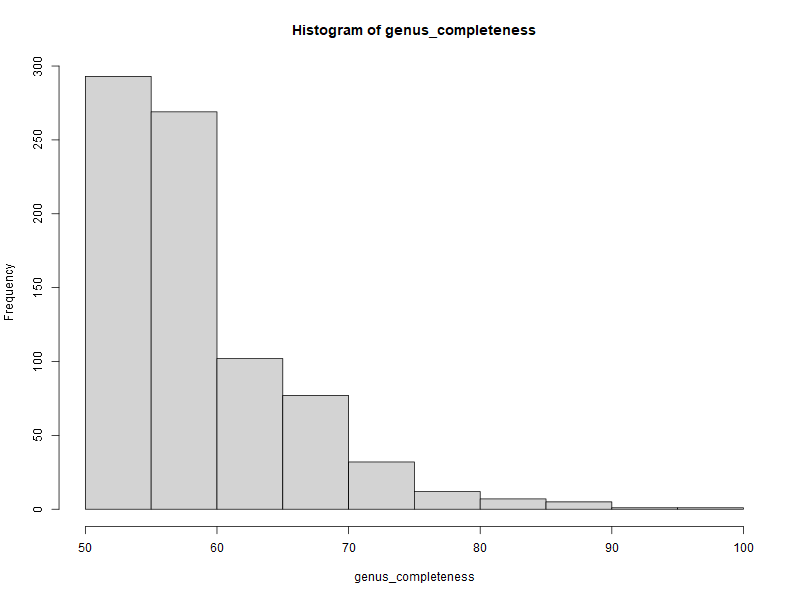

In [314]:
hist(genus_completeness)

### 6.2.3. Ratio Registres/Species

In [315]:
Ratio_r_genus = results_s_cov$n_incidences / results_s_cov$genus_obs
Ratio_r_genus

   [1] 1.080000 1.288889 1.031250 1.000000 1.076923 1.071429 1.074627 1.025641 1.714286 1.000000 1.307692       NA 1.541667 1.107143       NA 1.102941
  [17] 1.142857       NA 1.100000 1.000000 1.139535 1.058824 1.045455 1.166667 1.538462 1.333333 1.105263 1.000000 1.659794 1.180328 1.380952 1.000000
  [33] 1.000000 1.033898 1.000000 1.160000 1.000000 1.000000 1.000000       NA 1.172662       NA       NA 1.000000 1.307692 1.255000       NA 1.166667
  [49] 1.000000 1.000000 1.068966 1.000000 1.125000 1.368421 1.185185 1.466667 1.546341 1.482328 1.000000 1.000000 1.233333 1.114286 1.000000       NA
  [65] 1.400000 1.000000 1.000000 1.360000       NA 1.169811 1.000000 1.250000 1.378251 1.239437 1.183333 1.166667 1.000000       NA       NA 1.045455
  [81] 1.312500 1.090909 1.263158 1.000000 1.000000 1.233333 1.214765 1.000000 1.022727 1.373737       NA 1.230284 1.000000 1.000000 1.000000 1.000000
  [97] 1.000000       NA 1.000000 1.052632 1.000000 1.000000 1.000000       NA 1.000000 1.0714

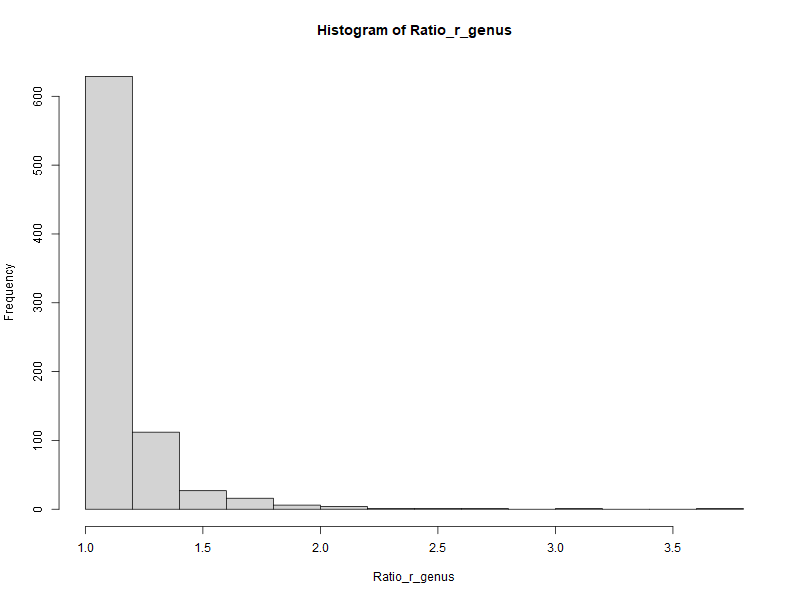

In [317]:
hist(Ratio_r_genus)

### 6.2.4. Asysntotic Function (Clench)

### 6.2.  Join Sample covergate with 10 km grid

In [ ]:
grid_10km = grid_10km%>% 
  left_join(results_s_cov, by = "id_10km")


In [320]:
results_s_cov

   id_10km Samplig_coverage n_units n_incidences genus_obs  Q1 Q2     sc_ext n_units_ext genus_ext genus_completeness
1     2149           0.1948       4           27        25  23  2 0.35731935           8        45           55.55556
2     4633           0.5017       4           58        45  34  9 0.73989689           8        68           66.17647
3     4444           0.0692       8           33        32  31  1 0.13505533          16        62           51.61290
4     4073           0.0741       2           26        26  26  0 0.21319265           4        50           52.00000
5     4448           0.1705       6           14        13  12  1 0.31865019          12        24           54.16667
6     5089           0.1756       4           15        14  13  1 0.32507449           8        25           56.00000
7     2417           0.1526      11           72        67  62  5 0.28932200          22       123           54.47154
8     3888           0.0599       6           40        

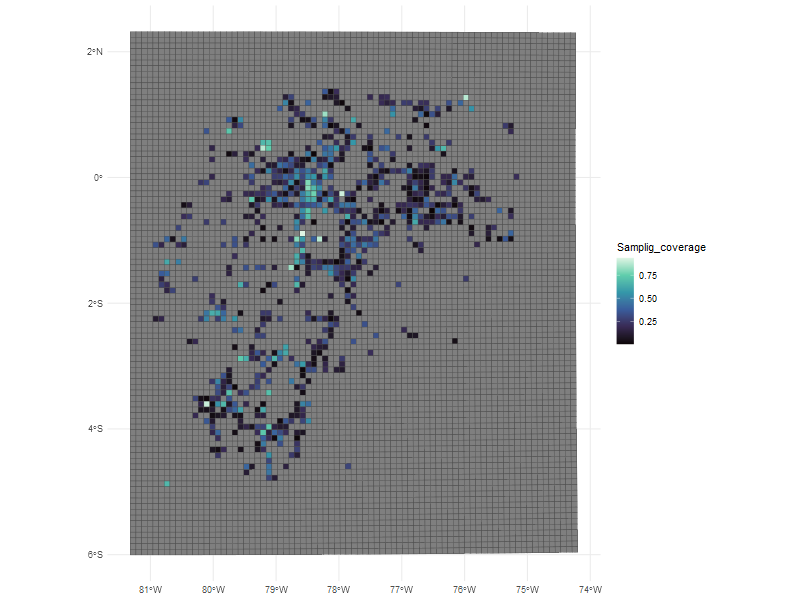

In [321]:
ggplot(grid_10km) +
  geom_sf(aes(fill = Samplig_coverage), color = "grey30", size = 0.1) +
  scale_fill_viridis_c(option = "mako") +
  theme_minimal()

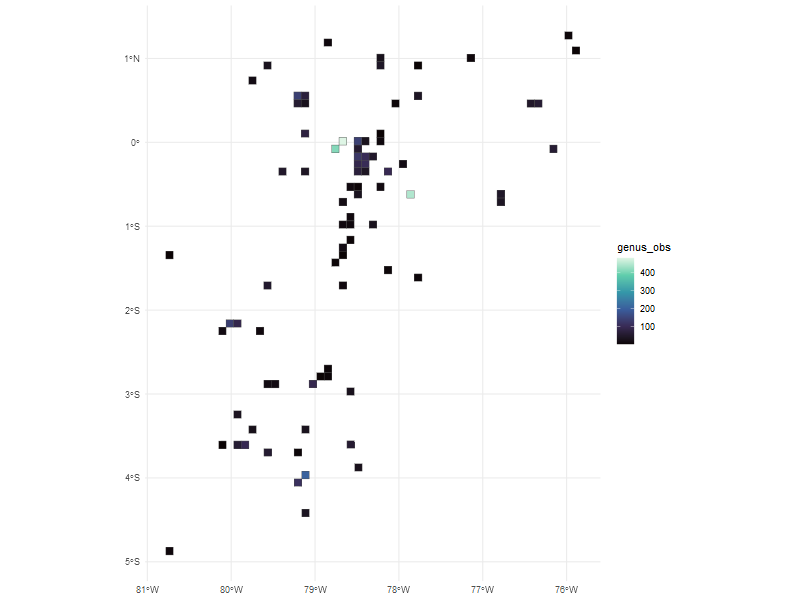

In [329]:
grid_10km_filter = grid_10km %>% filter(Samplig_coverage >= 0.5)

 grid_10km_filter %>% ggplot() +
  geom_sf(aes(fill = genus_obs), color = "grey30", size = 0.1) +
  scale_fill_viridis_c(option = "mako") +
  theme_minimal()

In [324]:
grid_10km_filter %>% ggplot() +
  scale_fill_viridis_c(option = "mako") +
    theme_minimal()